### 1. Import data and revelant packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
combined = pd.read_csv('/Users/admin/Downloads/combined_psf.csv')
combined = combined.drop(combined.columns[0], axis=1)
combined.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,~-,0.380502,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,~-,0.123495,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,~-,0.123495,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Terrace,999.00,27,6,8,2,-1.0,1.292047,103.768591,~-,0.380502,1714.68927,1533.805597
4,4,COVE DRIVE,Condominium,85.25,11,3,2,0,-1.0,1.244208,103.827487,~01-05,0.173732,2088.19660,1522.845119


In [3]:
combined['floor_range'] = combined['floor_range'].str.replace('~', '')
combined.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,-,0.380502,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,-,0.123495,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,-,0.123495,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Terrace,999.00,27,6,8,2,-1.0,1.292047,103.768591,-,0.380502,1714.68927,1533.805597
4,4,COVE DRIVE,Condominium,85.25,11,3,2,0,-1.0,1.244208,103.827487,01-05,0.173732,2088.19660,1522.845119


In [4]:
street_mapping = pickle.load(open('/Users/admin/Downloads/street_mapping.pickle', 'rb'))
floor_mapping = pickle.load(open('/Users/admin/Downloads/floor_mapping.pickle', 'rb'))
property_mapping = pickle.load(open('/Users/admin/Downloads/property_mapping.pickle', 'rb'))

combined['street'] = combined['street'].str.upper()
combined['street'] = combined['street'].map(street_mapping)
combined['propertyType'] = combined['propertyType'].map(property_mapping)
combined['floor_range'] = combined['floor_range'].map(floor_mapping)

In [5]:
combined.dtypes

district              int64
street                int64
propertyType          int64
remaining_lease     float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_range           int64
sentiment           float64
floor_area_sqft     float64
price_psf           float64
dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(combined.drop('price_psf', axis=1),
                                                    combined['price_psf'], 
                                                    test_size=0.2,
                                                    random_state=1)

### 2. Linear Regression

In [7]:
print(X_train.shape)
print(X_test.shape)

(106952, 14)
(26738, 14)


In [8]:
print(y_train.shape)
print(y_test.shape)

(106952,)
(26738,)


In [9]:
y_train

108498     372.633433
89796      470.445637
87684      390.051309
26955     1973.163821
130330     360.249951
             ...     
73349      352.772025
109259     419.973053
50057      329.656267
5192      1480.602635
128037     481.407128
Name: price_psf, Length: 106952, dtype: float64

In [10]:
X_train.isnull().any()

district            False
street              False
propertyType        False
remaining_lease     False
school              False
hawkercentre        False
supermarkets        False
Bus Stops Nearby    False
crime_number        False
latitude            False
longitude           False
floor_range         False
sentiment           False
floor_area_sqft     False
dtype: bool

In [11]:
# Fit and transform X training and testing
scaler = MinMaxScaler()
col = ['remaining_lease', 'school', 'hawkercentre', 'supermarkets',
      'Bus Stops Nearby', 'crime_number', 'floor_area_sqft']
x = X_train[col].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = col, index = X_train.index)
X_train[col] = df_temp

x_test = X_test[col].values
x_test_scaled = scaler.transform(x_test)
df_temp = pd.DataFrame(x_test_scaled, columns = col, index = X_test.index)
X_test[col] = df_temp

# Fit and transform Y training and testing
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1)).reshape(1,-1)[0]
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).reshape(1,-1)[0]

print(y_train.shape)
print(y_test.shape)

(106952,)
(26738,)


In [12]:
y_train.shape

(106952,)

In [13]:
# Creates a LinearRegression object (Ordinary least squares Linear Regression)
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### 2.1 Calculate Metrics for Base Model

In [14]:
# Compute MSE
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))

mse_training = mse(lm.predict(X_train), y_train)
mse_testing = mse(lm.predict(X_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.0029902011144000563, testing mse: 0.0030199954276857077
training rmse: 0.054682731409468346, testing rmse: 0.054954485055231914


In [15]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(X_train, y_train), lm.score(X_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 
    1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))


training R2: 0.5985375916646334, testing R2: 0.6004054067669877
training adjusted R2: 0.5984850329270899, testing adjusted R2: 0.6001960618466846


In [16]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(X_train)),
    mean_absolute_error(y_test, lm.predict(X_test)),    
))

training MAE: 0.03829035703628735, testing MAE: 0.038694705090596665


In [17]:
# Calculate sMAPE
def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred-y_true) / (np.abs(y_true) + np.abs(y_pred))*100)

smape_training = smape(y_train, lm.predict(X_train))
smape_testing = smape(y_test, lm.predict(X_test))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 36.41888714276743, testing smape: 36.53088933136057


In [18]:
# Calulate MAPE
def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape
mape_training = MAPE(y_train, lm.predict(X_train))
mape_testing = MAPE(y_test, lm.predict(X_test))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: inf, testing mape: 40.6935445372386


<ipython-input-18-bbc8ce926891>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100


### 2.2 Residual Plot for Base Model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

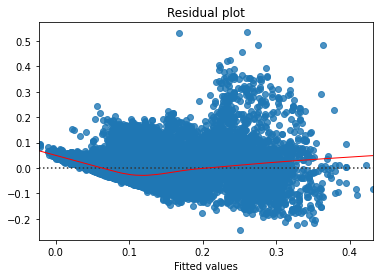

In [19]:
# Residual plot
sns.residplot(lm.predict(X_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

[-0.01310183  0.12891189  0.03474276 ...  0.09232683 -0.02011715
 -0.01369857]


Text(0.5, 1.0, 'Normal Q-Q Plot')

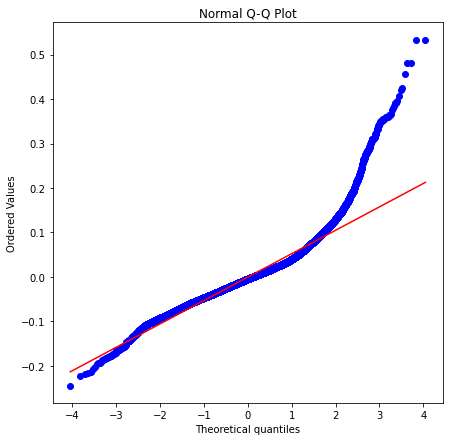

In [20]:
# QQ Plot
residuals = y_test - lm.predict(X_test).reshape(-1)
print(residuals)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

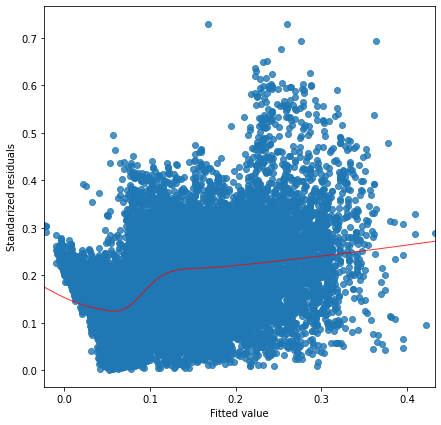

In [21]:
# Scale Location Plot
norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(lm.predict(X_test).reshape(-1), norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

### 2.3 Feature Cross

In [22]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

### 2.4 Error Metrics and Coefficients

In [24]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.00258524712690328, testing mse: 0.002597903920366926
training rmse: 0.05084532551674028, testing rmse: 0.050969637239899265


In [25]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(OHE_train, y_train), lm.score(OHE_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1), 
    1 - (1-lm.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)))


training R2: 0.6529064440814663, testing R2: 0.6562549893948032
training adjusted R2: 0.6528025617613044, testing adjusted R2: 0.6558430874910636


In [26]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(OHE_train)),
    mean_absolute_error(y_test, lm.predict(OHE_test)),    
))

training MAE: 0.035814078074729826, testing MAE: 0.03605630497907943


In [27]:
# Calculate sMAPE
smape_training = smape(y_train, lm.predict(OHE_train))
smape_testing = smape(y_test, lm.predict(OHE_test))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 33.98117467775237, testing smape: 34.00238305020712


In [28]:
# Calulate MAPE
mape_training = MAPE(y_train, lm.predict(OHE_train))
mape_testing = MAPE(y_test, lm.predict(OHE_test))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: inf, testing mape: 37.74484342369613


<ipython-input-18-bbc8ce926891>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100


### 2.5 Residual Plots for Feature-Crossed Model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

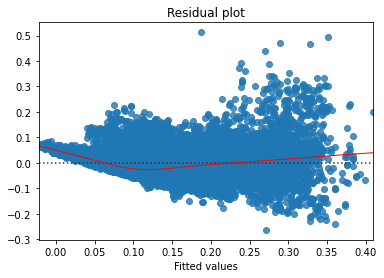

In [29]:
# Residual plot
sns.residplot(lm.predict(OHE_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

[-0.02157877  0.13092289  0.01504384 ...  0.04223192 -0.05162362
 -0.03803071]


Text(0.5, 1.0, 'Normal Q-Q Plot')

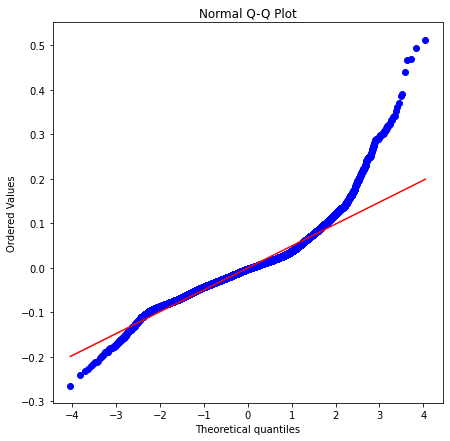

In [30]:
# QQ Plot
residuals = y_test - lm.predict(OHE_test).reshape(-1)
print(residuals)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

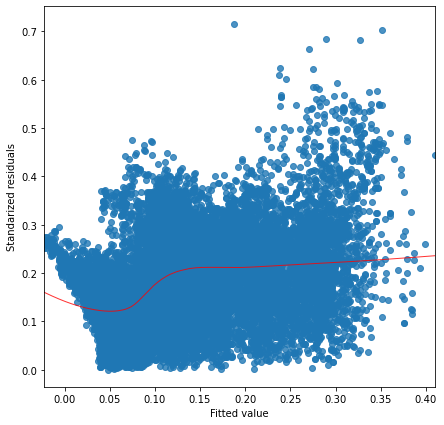

In [31]:
# Scale Location Plot
norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(lm.predict(OHE_test).reshape(-1).reshape(-1), norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [32]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,-0.005201
1,street,-0.000009
2,propertyType,0.011932
3,remaining_lease,0.112805
4,school,0.017015
5,hawkercentre,-0.121602
6,supermarkets,-0.023945
7,Bus Stops Nearby,0.012344
8,crime_number,-0.019302
9,floor_range,0.008269


### 3. Polynomial Regression and Error Metrics

In [33]:
pre_process = PolynomialFeatures(degree=2)

# Transform with OHE datasets
X_poly = pre_process.fit_transform(OHE_train)
X_test_poly = pre_process.transform(OHE_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

mse_training = mse(poly_model.predict(X_poly), y_train)
mse_testing = mse(poly_model.predict(X_test_poly), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.0011554130364677027, testing mse: 0.0012337929858481909
training rmse: 0.03399136708736062, testing rmse: 0.03512538947610675


In [34]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(poly_model.score(X_poly, y_train), 
                                               poly_model.score(X_test_poly, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-poly_model.score(X_poly, y_train))*(len(y_train)-1)/(len(y_train)-X_poly.shape[1]-1), 
    1 - (1-poly_model.score(X_test_poly, y_test))*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)))


training R2: 0.8448750159283286, testing R2: 0.8367490884939645
training adjusted R2: 0.8440570338241439, testing adjusted R2: 0.8332503201047955


In [35]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, poly_model.predict(X_poly)),
    mean_absolute_error(y_test, poly_model.predict(X_test_poly)),    
))

training MAE: 0.02121017842899284, testing MAE: 0.021657210491231534


In [36]:
# Calculate sMAPE
smape_training = smape(y_train, poly_model.predict(X_poly))
smape_testing = smape(y_test, poly_model.predict(X_test_poly))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 18.69480594997163, testing smape: 18.888642801426037


In [37]:
# Calculate MAPE
mape_training = MAPE(y_train, poly_model.predict(X_poly))
mape_testing = MAPE(y_test, poly_model.predict(X_test_poly))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: inf, testing mape: 20.325680420676427


<ipython-input-18-bbc8ce926891>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100


In [38]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], poly_model.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,0.000079
1,street,0.012985
2,propertyType,-0.000009
3,remaining_lease,0.024981
4,school,1119.823177
5,hawkercentre,0.349040
6,supermarkets,-0.510543
7,Bus Stops Nearby,0.037990
8,crime_number,-0.023427
9,floor_range,-0.304087
